# Apply SVM to non-linearly-separable data.

## Kernels.
A kernel computes k(a,b)=dot_product(f(a),f(b)) regardless of what f() is.
A kernel maps two vectors to a real scalar, without computing f().
Several kernels have been studied including linear, quadratic, and string.
Kernels permit computatin using the kernel trick and Quadratic Programming.
Kernels are an optimization for high degree computation.
Kernels don't scale. They are quadratic or worse in train set size. 

## SVM is the classic kernelized learning algorithm.
Papers on "kernel-based methods" usually use SVM.
Kernelized means not required to transform every data instance to a 
fixed-length, real-valued feature vector.

## Approaches covered:
* SVM with polynomial features.
* SVM with a polynomial kernel which accomplishes the same thing with Quadratic Programming.
* SVM with Radial Basis Function kernel.



In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 
from sklearn.preprocessing import PolynomialFeatures

# Moon data.
# Toy dataset for testing non-linearly separable data.
# Requires polynomial features.

from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.15)
X,y = make_moons(n_samples=100, noise=0)
y[:5],X[:5]

(array([0, 1, 1, 1, 0]),
 array([[-0.03205158,  0.99948622],
        [ 1.94905575,  0.18489178],
        [ 1.57211666, -0.32017225],
        [ 0.00205461,  0.43592978],
        [-0.90096887,  0.43388374]]))

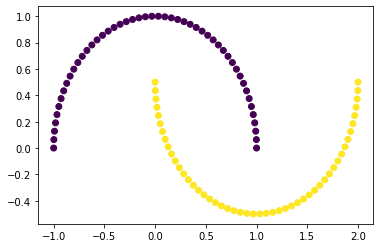

In [77]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
# The data is not linearly separable.

In [95]:
# These two points would be hard to classify. 
# They are both on the X-axis.
class1_example=np.array([0,0])
class0_example=np.array([1,0])

In [96]:
# First try with linear features.
svm=LinearSVC(C=1, loss='hinge')
pipe1 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',svm) 
])
pipe1.fit(X,y)
pipe1.predict([class0_example]), pipe2.predict([class1_example])
# Classifier is wrong.

(array([1]), array([1]))

In [97]:
# Second try with polynomial features. 

# I tried this with degree=2 and that did not help.
# As expected, degree=3 worked.
# On some tests I got the error "Failure to converge."
# I made it work by setting more iterations (default=1K).
svm=LinearSVC(C=1, loss='hinge', max_iter=90000)
pipe2 = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm',svm) 
])
pipe2.fit(X,y)
pipe2.predict([class0_example]), pipe2.predict([class1_example])
# Classifier working.

(array([0]), array([1]))

In [98]:
# Degree 3 features.
svm.intercept_, svm.coef_

(array([0.00066964]),
 array([[ 0.00000000e+00, -1.01277627e+00, -4.25979764e-01,
         -2.34557293e+00, -3.26197766e-01, -1.79877937e-03,
          3.33763468e+00, -1.22400169e-01,  4.63347886e-01,
         -5.08840379e-01]]))

In [101]:
# Polynomial kernel.
# The solution above won't scale to high precision.
# Instead, use a kernel.
# This simplifies the math but does not scale to large dimensions or large data sets.

from sklearn.svm import SVC
svm=SVC(kernel='poly',degree=3, coef0=1, C=5)
pipe3 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',svm)     
])
pipe3.fit(X,y)
pipe3.predict([class0_example]), pipe3.predict([class1_example])
# Classifier working.

(array([0]), array([1]))

In [102]:
# Radial Basis Function.
# RBF(x) = function distance of x to some landmark.
# RBF is one type of Similarity Feature.

# Can use z landmarks to generate z features.
# Which landmarks? Each training instance is one option (but feature dimension grows).

# Approximations of RBF can reduce feature dimension to help with kernel trick.
# These include Fourier transform and eigendecomposition.

# Bioinformatics kernels:
# 1) String kernel for DNA. Also String subsequence kernel.
# 2) Fisher kernel used for protein similarity.
# 3) Spectrum kernel for protein classification.
# 4) A k-mer spectrum kernel used by SVM to recognize TFBS. 
#    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5628859/ (Elmas et al 2017)

# RBF Kernel uses exp(-distance^2) so it squashes large distances. 
# Guassian RBF fits distance to normal curve.

In [105]:
svm=SVC(kernel='rbf', gamma=3, C=1)   # gamma controls dimensionality
pipe4 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',svm)     
])
pipe4.fit(X,y)
pipe4.predict([class0_example]), pipe4.predict([class1_example])
# Classifier working.

(array([0]), array([1]))

In [114]:
# Other uses for SVM.

# SVM for Outliers.
# SVM for unsupervised outlier detection: sklearn.svm.OneClassSVM.

# SVM for Regression.
# Try linear regression first.
from sklearn.svm import LinearSVR
reg=LinearSVR(epsilon=.5)  
# epsilon is width of margin * 2. Results seem sensitive to this parameter despite epsilon-insensitive loss.
# The regularization parameter C defaults to 1
# This model has parameters for L1 lss = epsilon-insensitive loss (default) or L2 loss.
# Documentation says set dual=False when samples>features.
reg.fit(X,y)
reg.intercept_, reg.coef_
# Linear regression coefficients are goofy.

(array([0.5000003]), array([ 8.85396407e-07, -4.54015172e-06]))

In [116]:
# Linear regression predictions are wrong.
reg.predict([class0_example]), reg.predict([class1_example])

(array([0.50000118]), array([0.5000003]))

In [125]:
# Try polynomial regression.
from sklearn.svm import SVR
reg=SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
reg.fit(X,y)
reg.intercept_, reg.dual_coef_[0,:5]  # coef_ usef for linear, dual_coef_ for polynomial.

(array([0.90546924]), array([-100., -100., -100.,  100.,  100.]))

In [126]:
reg.support_vectors_[:5]

array([[-0.90096887,  0.43388374],
       [-0.80141362,  0.59811053],
       [ 1.        ,  0.        ],
       [ 0.00820999,  0.37212284],
       [ 0.71547241, -0.45866785]])

In [127]:
# The rest of this chapter covers the math "under the hood".
# No python.